In [2]:
import tensorflow as tf
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt

import scipy.ndimage
import math

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#!pip install -U keras-tuner

We load the mnist dataset which has images of handwritten digits as 28 x 28 pixel images and split the mnist dataset to training set and testing set. The training set has 60000 images while the test set has 10000 images. We set the class label names as 'zero' to 'nine'.

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# list of names for each class label
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [ ]:
#We see that the data is of type uint8, which refers to 8 bits of unsigned integers. This means that each number is between 0 and 255.
np.max(train_images[12321])

255

Normalise the inputs, since the maximum pixel value is 255, we divide each pixel value by 255, so they are normalised to between 0 and 1. This can improve speed of convergence and prevent exploding gradient values.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#We have 60000 images, each is 28 x 28 pixels

train_images.shape, type(train_images)

((60000, 28, 28), numpy.ndarray)

In [ ]:
test_images.shape

(10000, 28, 28)

#### Building the model

The initial model is built with 3 layers. Input layer takes a flattened image matrix as inputs, the hidden layer consist of 128 nodes with relu activation function, and the output layer consists of 10 softmax nodes which each return a probability that the image belongs to some digit class. The highest output node value classifies the label of the input.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #flatten 28 x 28 matrix into a vector

    #layer with 128 outputs, using relu activation function
    tf.keras.layers.Dense(128, activation=tf.nn.relu),

    #layer with 10 outputs, using softmax, using softmax activation function
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Model summary shows how may layers, nodes, and parameters (weights) of each layer.
e.g. hidden layer has 128 nodes, and 100480 weights because 128 x 784 = 100480, i.e. every node in hidden layer is connected to the 784 input nodes in input layer.

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

We compile the model by specifying the weight update optimiser, loss function and accuracy metric.
The optimiser used is adam, which adaptively update the weights by the moving average of past nd current gradients of loss function with respect to the weights, which gives momentum to the weight updates for faster convergence and prevents the loss function converging to a local minimum.

The loss function is sparse categorical cross entropy, which computes the crossentropy loss between the labels and predictions for two or more label classes. It is given by $L(y, p) = - \sum_{i=1}^{C} y_i \cdot \log(p_i)$. Where $y_i$ is the true probability of the class i being 1 or 0, and $p_i$ is the probability predicted by the model for the class i. If for the true class, $p_i$ is high (near 1), then $log(p_i)$ is near 0 so we have small loss.

The 'accuracy' metrics calculates how often predictions equal true labels.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

We compile the model and fit the training images and labels to train the model.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step - accuracy: 0.8761 - loss: 0.4434
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.9675 - loss: 0.1116
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9786 - loss: 0.0725
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.9841 - loss: 0.0523
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9870 - loss: 0.0414
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.9905 - loss: 0.0313
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.9917 - loss: 0.0267
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.9941 - loss: 0.0199
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9961 - loss: 0.0147
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9954 - loss: 0.0148


#### Evaluating test data using the trained network

Get the average loss computed by loss function over the entire test data, and get the accuracy score of the model on the test data.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.9747 - loss: 0.0948
Test accuracy: 0.9778000116348267


Get the predicted output (in probabilities for each class) but using the model to predict on the test data.

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step


Check the predicted probabilities for each class for test image indexed 200.

In [ ]:
predictions[200], sum(predictions[200])

(array([1.2538343e-13, 3.6880579e-13, 9.6023321e-08, 9.9997854e-01,
        1.0590814e-14, 8.6239947e-07, 1.3929321e-15, 4.2900134e-13,
        2.0570174e-05, 2.9579647e-10], dtype=float32),
 1.0000000712218642)

Get the predicted class, based on the class with highest probability for test image no. 200 from prediction outputs.

In [ ]:
np.argmax(predictions[200]), class_names[np.argmax(predictions[200])]

(3, 'three')

Plot the test image no. 200 in black and white (binary).

(<matplotlib.image.AxesImage at 0x7efedf753710>, 'three')

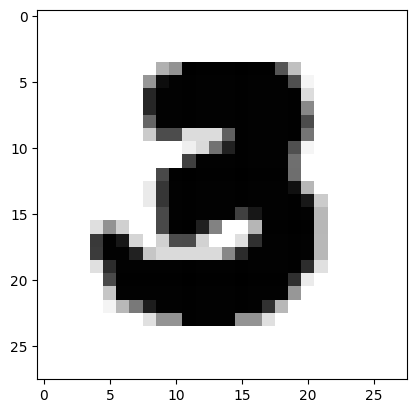

In [ ]:
plt.imshow(test_images[200],cmap="binary"), class_names[test_labels[200]]

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


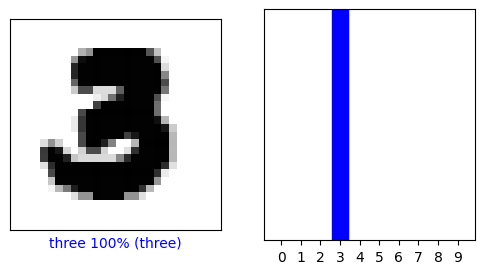

In [ ]:
i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


Plot the first 15 images after the first 20 images from the test dataset. Below each digit image, the x-axis label means predicted class label, confidence percentage of prediction, and true class label. The bar chart represents predicted probability for each class label, for a test image plotted on the left of the bar chart.

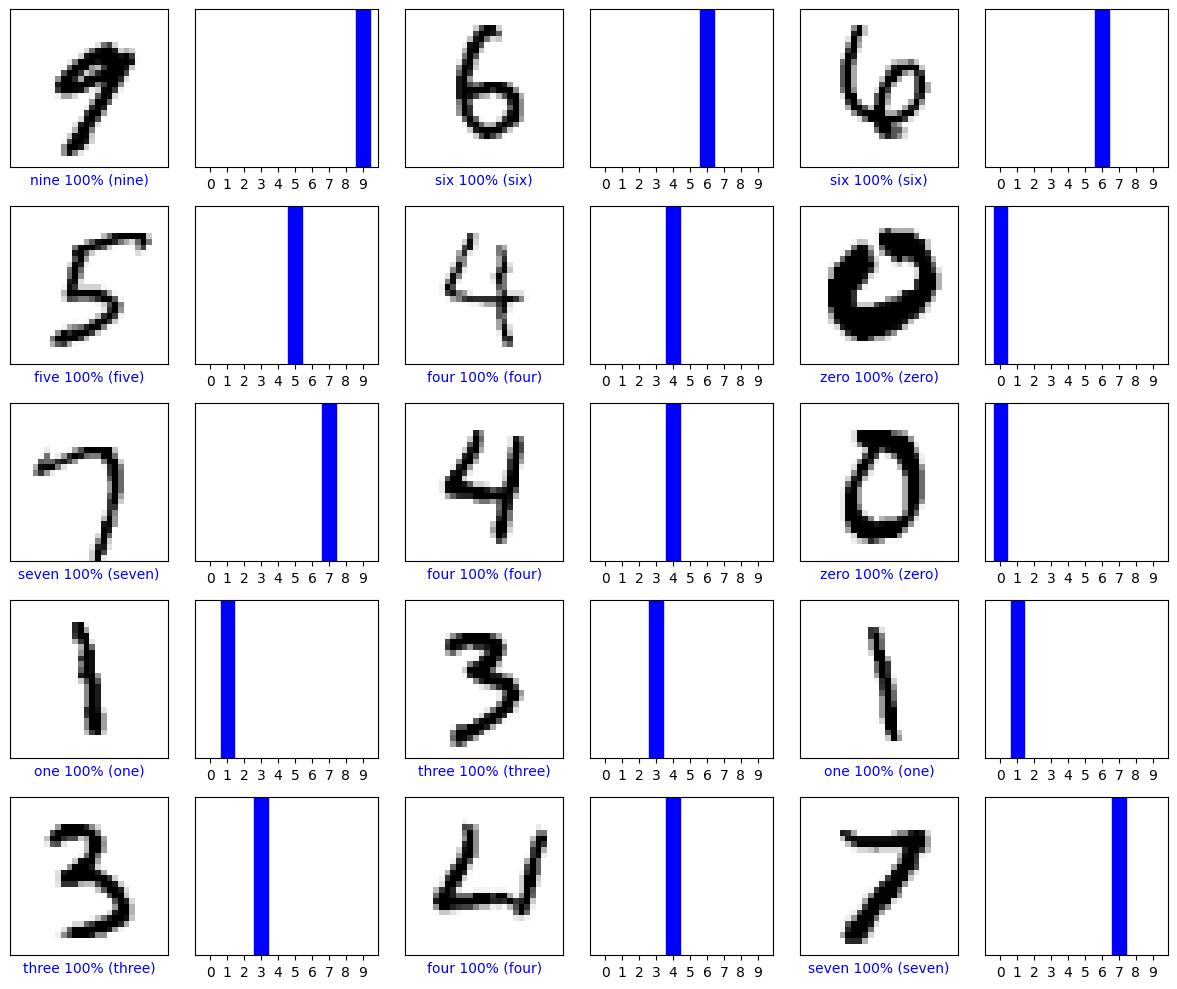

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

offset=20
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+offset, predictions[i+offset], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+offset, predictions[i+offset], test_labels)
plt.tight_layout()
plt.show()

We get all the wrong predictions from the model and store them in a list, by comparing the class label with the largest probability to the true class label for a test image indexed i. If they are not equal, we append the index of the test image in the test data in a list.

In [ ]:
wrong_predictions_index = []

for i in range(10000):
    if np.not_equal(np.argmax(predictions[i]), test_labels[i]):
        wrong_predictions_index.append(i)

wrong_predictions_index = np.asarray(wrong_predictions_index)


We visualise the test images that are incorrectly predicted. e.g. In first pic, the predicted is 5, but correct class is 9. The confidence percentage that the model think the image is a five, is 73%.

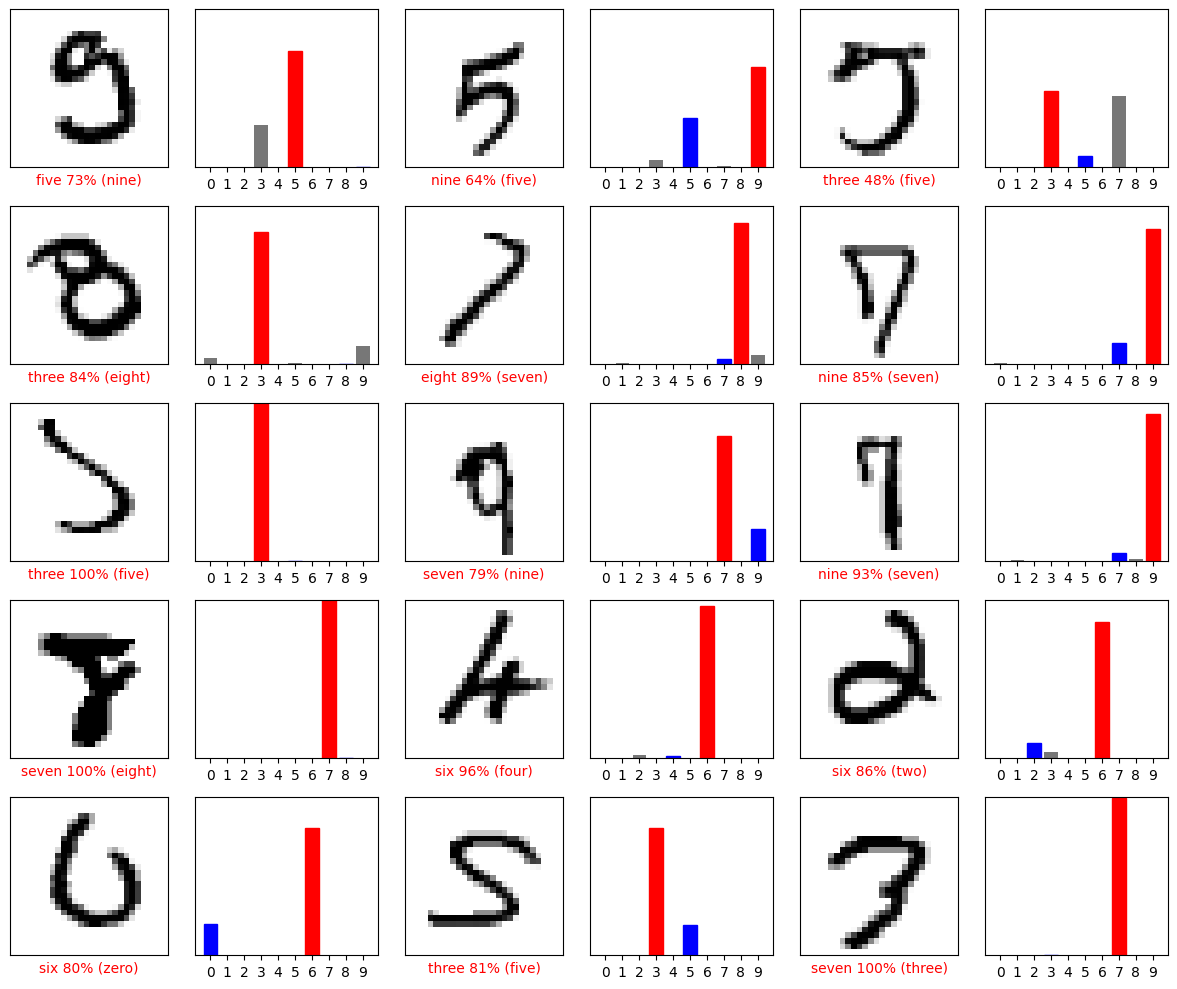

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

offset=30 #skips the first 30 images in the dataset you are plotting from
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) #size of entire plot

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1) #plt.subplot(number of rows in plot, number of columns in plot, index where subplot starts in the plot)
    plot_image(wrong_predictions_index[i+offset], predictions[wrong_predictions_index[i+offset]], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(wrong_predictions_index[i+offset], predictions[wrong_predictions_index[i+offset]], test_labels)

plt.tight_layout()
plt.show()

#labels below handwriting image: "wrong label" "percentage of certainty of the prediction %" "(correct label)"
#bar chart shows percentage of certainty of prediction being a certain class label

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try
   - Change the number of nodes in the hidden layer
   - Use a different loss function
   - Use a different optimizer
   - change the number of epochs
   - change the batch size
   - play with a dropout layer
   - work with two hidden layers
   - work with three hidden layers
   
Explain the effect of changing parameters in your own words and draw conclusions about how performance improves.  The mark for this part will depend on the overall insight demonstrated.  Code alone does not yield marks.
Note that one aspect of performance is required training time.  Do not use code cells which take longer than 10 minutes to run on standard CPU based hardware. (Also don't use code which exceeds standard memory requirements of about 8GB RAM, but that should not be an issure here)



In [ ]:
%load_ext tensorboard

We create a random search function to do random search for optimal hyperparameters. The hyperparameters to be searched are number of hidden layers, number of nodes in each hidden layer, activation functions, learning rate (size of update on weights, by a factor of the gradient of loss function with respect to weights), and type of optimiser function to update the weights (Adam, SGD, Adagrad).

In [ ]:
def search_model_coarse(hp):
    # hp is an object provided by Keras Tuner, which is a library designed to perform hyperparameter tuning
    # this function does random search for hyperparameters

    # create model that groups a linear stack of layers of nodes
    model = tf.keras.models.Sequential()

    # add input layer that takes vector of flattened image as input, each node correspond to an element in the vector
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

    # search space for number of hidden layers, from 1 up to 3 layers
    num_layers = hp.Int("num_layers", min_value=1, max_value=3, step=1)

    # search space for activation function: relu, elu, or sigmoid
    act_fuc = hp.Choice("act_fuc", ["relu", "elu", "sigmoid"])

    # for each hidden layer, set a random number of nodes between 10 to 200
    for i in range(num_layers):
        neurons = hp.Int(f"num_neurons_layer_{i}", min_value=10, max_value=200, step=2, sampling='log')

    # add the hidden layers
    model.add(tf.keras.layers.Dense(neurons, activation=act_fuc))

    # Adds an output layer with 5 neurons and a softmax activation function, which is typically used for multi-class
    # classification problems (with 5 classes in this case).
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    # search space for learning rate
    lr = hp.Choice("learning_rate", values=[0.01, 0.001, 0.0001])

    # search space for weight optimiser function
    optimizer = hp.Choice('optimizer', values=['adam', 'adagrad', 'SGD'])

    # Conditional for each optimizer
    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == 'adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr)
    elif optimizer == 'SGD':
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)

    loss_function = hp.Choice("loss", values=["sparse_categorical_crossentropy"])

#############################################################################################################################

    model.compile(
    optimizer = optimizer,
    #tf.keras.optimizers.Adam(learning_rate=lr),
    loss = loss_function,
    metrics = ["accuracy"]
    )

    return model

In [ ]:
%tensorboard --logdir "./hyp_searches/coarse_search_bs16" #load tensorboard from directory or create tensorboard file in directory

Stop at trial 30 (around 10 minutes), from the random search, the best cross-validation accuracy (tested on validation data splitted from training data), is 0.957%. Each trial trains the model over 10 epochs, with a batch size of 16 per weight update, and 80% of the training data is used for training, 20% is used for validation testing.

In [ ]:
# create Keras tuner object (Random Search function for hyperparameters)
# set other hyperparameters for the random search function (not model hyperparameters)
tuner = kt.RandomSearch(search_model_coarse,
                        objective='val_accuracy', # The tuner will try to maximize validation accuracy
                        max_trials=50, # do random search 50 times
                        seed=43, # random seed for choosing random hyperparameters
                        overwrite=True,
                        directory="./hyp_searches/",
                        project_name="coarse_search_bs16")

tuner.search(
    train_images,
    train_labels,
    validation_split = 0.8,
    batch_size=16,
    epochs=10,
    callbacks=[tf.keras.callbacks.TensorBoard("./hyp_searches/coarse_search_bs16/tb_logs")]#update the tensorboard log
)

Trial 30 Complete [00h 00m 18s]
val_accuracy: 0.8633986711502075

Best val_accuracy So Far: 0.9573134183883667
Total elapsed time: 00h 09m 23s

Search: Running Trial #31

Value             |Best Value So Far |Hyperparameter
1                 |3                 |num_layers
sigmoid           |relu              |act_fuc
80                |80                |num_neurons_layer_0
0.01              |0.001             |learning_rate
adagrad           |adam              |optimizer
sparse_categori...|sparse_categori...|loss
40                |80                |num_neurons_layer_1
160               |160               |num_neurons_layer_2

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5182 - loss: 1.8208 - val_accuracy: 0.8025 - val_loss: 0.9970
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8322 - loss: 0.8589 - val_accuracy: 0.8494 - val_loss: 0.7099
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8649 - loss: 0.6455 - val_accuracy: 0.863

KeyboardInterrupt: 

From the random search, we get the best hyperparameter values, and use them to build a model named model2.

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'act_fuc': 'relu',
 'num_neurons_layer_0': 80,
 'learning_rate': 0.001,
 'optimizer': 'adam',
 'loss': 'sparse_categorical_crossentropy',
 'num_neurons_layer_1': 80,
 'num_neurons_layer_2': 160}

In [ ]:
# create model based on best hyperparameters from random search using Keras tuner
model2 = tf.keras.Sequential([
    #input layer
    tf.keras.layers.Flatten(input_shape=(28, 28)), #flatten 28 x 28 matrix into a vector

    #hidden layers
    #layer with 128 outputs, using relu activation function
    tf.keras.layers.Dense(80, activation=tf.nn.relu),

    tf.keras.layers.Dense(80, activation=tf.nn.relu),

    tf.keras.layers.Dense(160, activation=tf.nn.relu),

    #output layer
    #layer with 10 outputs, using softmax, using softmax activation function
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.fit(train_images, train_labels, epochs=14)

Epoch 1/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.8676 - loss: 0.4388
Epoch 2/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.9662 - loss: 0.1135
Epoch 3/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9748 - loss: 0.0805
Epoch 4/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - accuracy: 0.9801 - loss: 0.0637
Epoch 5/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.9832 - loss: 0.0513
Epoch 6/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.9873 - loss: 0.0398
Epoch 7/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.9884 - loss: 0.0369
Epoch 8/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.9895 - loss: 0.0333
Epoch 9/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 922us/step - accuracy: 0.9912 - loss: 0.0268
Epoch 10/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9912 - loss: 0.0253
Epoch 11/14
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9926 - loss: 0.0223
Epoch 12

We se that in terms of accuracy on the test data, model2 performed slightly better than the previous model. However the average loss is higher. Even though model2 is more complicated in terms of number of hidden layers (3 instead of 1), the previous model has performed very well with 0.9725 accuracy on the test data, that there is diminishing returns in increasing the complexity of the model.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.9725 - loss: 0.1073


In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.9731 - loss: 0.1368


c) (3 marks) Write your student number on paper and take a photo. How well are the individual digits recognized? (Hint: you need to convert the photo first into the desired format, and there are many ways to do this.  You are expected to read up on a suitable way yourself, and describe how you did it. Also upload the file of the photo with your solution, so that your notebook runs through. Use relative paths, when you refer to the photo file.



### Reference:
The codes below for transformation of images are retrieved from the Medium blog:
https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4

Now, we test the previous model on our own handwriting, the image below is our student id.

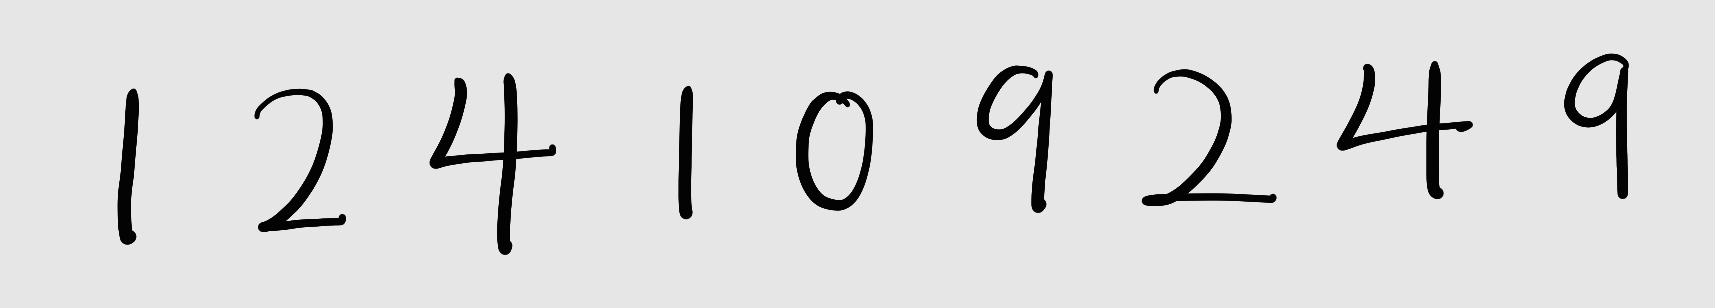

In [ ]:
from IPython.display import Image
Image(filename='/home/name/Downloads/Screenshot_20250222_203619_Samsung Notes.jpg')

We import the opencv (Open Computer Vision) library, which is an computer vision library with functions to read images, detect objects in images, and also transform images (rotate, shift, etc).

In [ ]:
import cv2 # library for image detection

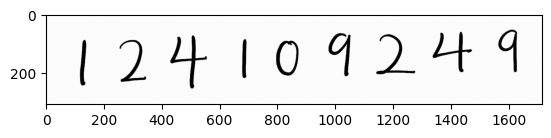

In [ ]:
file = r'/home/name/Downloads/Screenshot_20250222_203619_Samsung Notes.jpg'
test_image = cv2.imread(file,cv2.IMREAD_GRAYSCALE) #read the image as a grayscale image

plt.imshow(test_image, cmap='gray')#display in grayscale with cmap = 'gray

We cut out each digit from the student id based on their x-asis and y-axis positions on the matplotlib image above.

In [ ]:
height, width = test_image.shape

# Cut the image into images of digits
s1 = test_image[:, :200]
s2 = test_image[:, 200:390]
s3 = test_image[:, 390:600]
s4 = test_image[:, 600:760]
s5 = test_image[:, 760:900]
s6 = test_image[:, 900:1100]
s7 = test_image[:, 1100:1300]
s8 = test_image[:, 1300:1500]
s9 = test_image[:, 1500:1700]

image_list = [s1,s2,s3,s4,s5,s6,s7,s8,s9]

We define getBestShift function, which detects the center of mass of an object in the image using scipy.ndimage.center_of_mass. Then we shift the rows and columns of the image to centre the image. The shifting shifts the centre of mass of the object in the image to the centre of the image.

e.g.
With cols = 20, the width of the image is 20 pixels.

With cx = 7, the centre of the mass is at pixel number 7 out of 20.
     
Hence, cols/2 - cx = 20/2 - 7 = 3.
     
Thus we shift the image by 3 pixels to the right, now the centre of mass is at pixel 10 out of 20 along the horizontal direction,
     
so the centre of mass is also at the centre of the image width.

The shift function takes in an image, and how much to shift the image in the horizontal and vertical direction, then it creates a transformation matrix, which is then applied onto the image using cv2.warpAffine function to perform the shifting of the image.

In [ ]:
def getBestShift(img):

    # find centre of mass of an image
    # which are the x, y coordinates that is the center of the object in image
    # to centre an image that is not centred on the object in the image
    cy,cx = scipy.ndimage.center_of_mass(img)


    rows,cols = img.shape # number of rows and columns of pixels

    # how much to shift the rows and columns of the image to centre the image
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]]) # create transformation matrix to shift the image
                                        # shift sx pixels rightwards
                                        # shift sy pixels downwards
    shifted = cv2.warpAffine(img,M,(cols,rows)) #warpAffine function performs the transformation on
                                                #the image, in this case translation using matrix M
    return shifted

We create an array to store our images. To process the images for optimal recognition by the model, we convert the images to binary (black or white), and normalise the pixel values between 0 and 1. We then remove all the black rows and columns (part of the image that does not contain the mass of the image which refers to the digit in the image in this case). After that, we resize the image to an aspect ratio where either the height or width of the image is 20 pixels, while preserving the old aspect ratio of the image. Lastly, we pad the image to 28 x 28 pixels and perform shifting so that the mass (the digit in the image) is in the centre of the image.

In [ ]:
# create an array where we can store our 9 pictures
images = np.zeros((9,28,28)) #9 x 28 x 28 array, each picture is 28 x 28, there are 9 of them
# and the correct values
#correct_vals = np.zeros((9,10))

for i in range(9):
    # resize the images and invert it (black background)
    gray = cv2.resize(255-image_list[i], (28, 28))

    # convert the grayscale image to binary image (pixels are either black or white)
    # pixel values above 128 will be converted to 255 (represents white)
    # pixel values below 128 converted to 0 (black)
    (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    #Normalise the inputs
    gray = gray/ 255.0
###################################################################################
    # remove rows from top row of image that are completely black
    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    # remove columns from the left that are completely black
    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1) #delete object indexed 0, axis 1 (column)

    # remove columns from the bottom row that are completely black
    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    # remove columns from the right that are completely black
    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape

    # resize image
    # if number of rows of pixels > number of columns of pixels
    # if height > width
    if rows > cols:
        factor = 20.0/rows #factor to scale the width so that original aspect ratio is preserved
        rows = 20 # set desired height as 20

        # set desired width = (old width) * (20)/(old height)
        # rescales the width that maintains the aspect ratio of (old width)/(old height)
        cols = int(round(cols*factor))
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        gray = cv2.resize(gray, (cols, rows))

    # pads the image to 28 x 28 pixels
    # (number of columns to pad on the left), (number of columns to pad on the right)
    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    # (number of rows to pad on top), (number of rows to pad below)
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.pad(gray,(rowsPadding,colsPadding),'constant')

    #shift images to centre the image
    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted
###################################################################################
    #store image
    images[i] = gray

In [ ]:
self_test_labels = np.array([1,2,4,1,0,9,2,4,9]) #array to store correct label values

We get an accuracy of 1.0000, that means all digits are correctly recognised.

In [ ]:
test_loss, test_acc = model.evaluate(images, self_test_labels) #test model on the images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0501


In [ ]:
predictions2 = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
predictions_handwriting = []
for i in range(9):
    predictions_handwriting.append(np.argmax(predictions2[i]))

In [ ]:
predictions_handwriting #show predicted output of the model

[np.int64(1),
 np.int64(2),
 np.int64(4),
 np.int64(1),
 np.int64(0),
 np.int64(9),
 np.int64(2),
 np.int64(4),
 np.int64(9)]